In [104]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from petitRADTRANS import Radtrans
from petitRADTRANS.retrieval import Retrieval, RetrievalConfig
from petitRADTRANS.retrieval.models import *
from petitRADTRANS.retrieval.chemistry import get_abundances
import petitRADTRANS.retrieval.plot_style as ps
from petitRADTRANS.retrieval.parameter import Parameter
import petitRADTRANS.retrieval.cloud_cond as cc
from petitRADTRANS.retrieval.util import *

import scicomap as sc
import pandas as pd
import copy as cp
from glob import glob
import json

In [105]:
base_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/"
planet_dir = "b_full/"
retrieval_name = "HR8799b_23_v02_diseq_all_scaleos_freeFeMgCloud_mrprior_newdata_newphot"
#retrieval_name = "HR8799b_23_v04_diseq_all_scaleos_eqMgamFeCloud_mrprior_highfeh_fseds"

with open(f"{base_dir}{planet_dir}out_PMN/{retrieval_name}_params.json") as paramfile:
    param_names = json.load(paramfile)

samples = pd.read_csv(f"{base_dir}{planet_dir}out_PMN/{retrieval_name}_post_equal_weights.dat",names=param_names,delim_whitespace=True,index_col=False)

/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_35389/3253535422.py:9: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  samples = pd.read_csv(f"{base_dir}{planet_dir}out_PMN/{retrieval_name}_post_equal_weights.dat",names=param_names,delim_whitespace=True,index_col=False)


In [106]:
base_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/"
planet_dir = "b_full/"
#retrieval_name = "HR8799b_23_v02_diseq_all_scaleos_freeFeMgCloud_mrprior_newdata_newphot"
retrieval_name = "HR8799b_23_v04_diseq_all_scaleos_eqMgamFeCloud_mrprior_highfeh_fseds"

with open(f"{base_dir}{planet_dir}out_PMN/{retrieval_name}_params.json") as paramfile:
    eq_param_names = json.load(paramfile)

eq_samples = pd.read_csv(f"{base_dir}{planet_dir}out_PMN/{retrieval_name}_post_equal_weights.dat",names=eq_param_names,delim_whitespace=True,index_col=False)

/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_35389/3761619470.py:9: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  eq_samples = pd.read_csv(f"{base_dir}{planet_dir}out_PMN/{retrieval_name}_post_equal_weights.dat",names=eq_param_names,delim_whitespace=True,index_col=False)


In [107]:
parameters = {}
parameters['D_pl'] = Parameter('D_pl', False, value = 10.0*nc.pc)
parameters['mass'] = Parameter('mass',False,value = samples["mass"].median())
parameters['R_pl'] = Parameter('R_pl', False, value = samples["R_pl"].median())
   
parameters['T_int'] = Parameter('T_int', False, value = samples["T_int"].median())
parameters['T1'] = Parameter('T1', False, value = samples["T1"].median())
parameters['T2'] = Parameter('T2', False, value = samples["T2"].median())
parameters['T3'] = Parameter('T3', False, value = samples["T3"].median())
parameters['log_delta'] = Parameter('log_delta', False, value = samples["log_delta"].median())
parameters['alpha'] = Parameter('alpha', False, value = samples["alpha"].median())

parameters['Fe/H'] = Parameter('[Fe/H]', False, value = samples["Fe/H"].median())
parameters['C/O'] = Parameter('C/O', False, value = samples["C/O"].median())
parameters['log_pquench'] = Parameter('log_pquench', False, value = samples["log_pquench"].median())

parameters['sigma_lnorm'] = Parameter('sigma_lnorm', False, value = samples["sigma_lnorm"].median())

try:
    parameters['fsed'] = Parameter('fsed', False, value = samples["fsed"].median())
except KeyError:pass
try:
    parameters['fsed_MgSiO3(c)'] = Parameter('fsed_MgSiO3(c)', False, value = samples['fsed_MgSiO3(c)'].median())
except KeyError:pass
try:
    parameters['fsed_Fe(c)'] = Parameter('fsed_Fe(c)', False, value = samples['fsed_Fe(c)'].median())
except KeyError:pass

parameters['log_kzz'] = Parameter('log_kzz', False, value = samples["log_kzz"].median())

parameters[ 'OSIRIS2011_scale_factor'] =\
Parameter( 'OSIRIS2011_scale_factor', False, value = samples['OSIRIS2011_scale_factor'].median())

try:
    parameters['eq_scaling_MgSiO3(c)'] = Parameter('eq_scaling_MgSiO3(c)', False, value = samples['eq_scaling_MgSiO3(c)'].median())
except KeyError:pass
try:
    parameters['eq_scaling_Fe(c)'] = Parameter('eq_scaling_Fe(c)', False, value = samples['eq_scaling_Fe(c)'].median())
except KeyError:pass

try:
    parameters['log_X_cb_MgSiO3(c)'] = Parameter('log_X_cb_MgSiO3(c)', False, value = samples["log_X_cb_MgSiO3(c)"].median())
except KeyError:pass
try:
    parameters['log_Pbase_MgSiO3(c)'] = Parameter('log_Pbase_MgSiO3(c)', False, value = samples["log_Pbase_MgSiO3(c)"].median())
except KeyError:pass

try:
    parameters['log_X_cb_Fe(c)'] = Parameter('log_X_cb_Fe(c)', False, value = samples["log_X_cb_Fe(c)"].median())
except KeyError:pass
try:
    parameters['log_Pbase_Fe(c)'] = Parameter('log_Pbase_Fe(c)', False, value = samples["log_Pbase_Fe(c)"].median())
except KeyError:pass
#print(parameters['log_kzz'].value,parameters['fsed'].value,parameters['sigma_lnorm'].value)

In [108]:
eq_params = {}
eq_params['D_pl'] = Parameter('D_pl', False, value = 10.0*nc.pc)
eq_params['mass'] = Parameter('mass',False,value = eq_samples["mass"].median())
eq_params['R_pl'] = Parameter('R_pl', False, value = eq_samples["R_pl"].median())
   
eq_params['T_int'] = Parameter('T_int', False, value = eq_samples["T_int"].median())
eq_params['T1'] = Parameter('T1', False, value = eq_samples["T1"].median())
eq_params['T2'] = Parameter('T2', False, value = eq_samples["T2"].median())
eq_params['T3'] = Parameter('T3', False, value = eq_samples["T3"].median())
eq_params['log_delta'] = Parameter('log_delta', False, value = eq_samples["log_delta"].median())
eq_params['alpha'] = Parameter('alpha', False, value = eq_samples["alpha"].median())

eq_params['Fe/H'] = Parameter('[Fe/H]', False, value = eq_samples["Fe/H"].median())
eq_params['C/O'] = Parameter('C/O', False, value = eq_samples["C/O"].median())
eq_params['log_pquench'] = Parameter('log_pquench', False, value = eq_samples["log_pquench"].median())

eq_params['sigma_lnorm'] = Parameter('sigma_lnorm', False, value = eq_samples["sigma_lnorm"].median())

try:
    eq_params['fsed'] = Parameter('fsed', False, value = eq_samples["fsed"].median())
except KeyError:pass
try:
    eq_params['fsed_MgSiO3(c)'] = Parameter('fsed_MgSiO3(c)', False, value = eq_samples['fsed_MgSiO3(c)'].median())
except KeyError:pass
try:
    eq_params['fsed_Fe(c)'] = Parameter('fsed_Fe(c)', False, value = eq_samples['fsed_Fe(c)'].median())
except KeyError:pass

eq_params['log_kzz'] = Parameter('log_kzz', False, value = eq_samples["log_kzz"].median())

eq_params[ 'OSIRIS2011_scale_factor'] =\
Parameter( 'OSIRIS2011_scale_factor', False, value = eq_samples['OSIRIS2011_scale_factor'].median())

try:
    eq_params['eq_scaling_MgSiO3(c)'] = Parameter('eq_scaling_MgSiO3(c)', False, value = eq_samples['eq_scaling_MgSiO3(c)'].median())
except KeyError:pass
try:
    eq_params['eq_scaling_Fe(c)'] = Parameter('eq_scaling_Fe(c)', False, value = eq_samples['eq_scaling_Fe(c)'].median())
except KeyError:pass

try:
    eq_params['log_X_cb_MgSiO3(c)'] = Parameter('log_X_cb_MgSiO3(c)', False, value = eq_samples["log_X_cb_MgSiO3(c)"].median())
except KeyError:pass
try:
    eq_params['log_Pbase_MgSiO3(c)'] = Parameter('log_Pbase_MgSiO3(c)', False, value = eq_samples["log_Pbase_MgSiO3(c)"].median())
except KeyError:pass

try:
    eq_params['log_X_cb_Fe(c)'] = Parameter('log_X_cb_Fe(c)', False, value = eq_samples["log_X_cb_Fe(c)"].median())
except KeyError:pass
try:
    eq_params['log_Pbase_Fe(c)'] = Parameter('log_Pbase_Fe(c)', False, value = eq_samples["log_Pbase_Fe(c)"].median())
except KeyError:pass
print(eq_params['eq_scaling_MgSiO3(c)'].value)

1.336055073346456


In [109]:
line_species = ['H2O_Exomol_R_300', 
                'CO_all_iso_HITEMP_R_300', 
                'CH4_R_300', 
                'CO2_R_300', 
                'HCN_R_300', 
                'FeH_R_300', 
                'H2S_R_300', 
                'NH3_R_300', 
                'PH3_R_300', 
                'Na_allard_R_300', 
                'K_allard_R_300', 
                'TiO_all_Exomol_R_300', 
                'VO_R_300',
                'SiO_R_300',
                'FeH_R_300']

rayleigh_species = ['H2', 'He']
continuum_opacities = ['H2-H2', 'H2-He']
cloud_species = ['MgSiO3(c)_cd', 'Fe(c)_cd']

atmosphere = Radtrans(line_species = line_species,
                      rayleigh_species= rayleigh_species,
                      continuum_opacities = continuum_opacities,
                      cloud_species = cloud_species,
                      mode='c-k',
                      do_scat_emis=True,
                      wlen_bords_micron = [0.8,5.2],
                      hack_cloud_photospheric_tau = True)
pressures = np.logspace(-6,2,100)
atmosphere.setup_opa_structure(pressures)

line_species = ['H2O_Exomol_R_300', 
                'CO_all_iso_HITEMP_R_300', 
                'CH4_R_300', 
                'CO2_R_300', 
                'HCN_R_300', 
                'FeH_R_300', 
                'H2S_R_300', 
                'NH3_R_300', 
                'PH3_R_300', 
                'Na_allard_R_300', 
                'K_allard_R_300', 
                'TiO_all_Exomol_R_300', 
                'VO_R_300',
                'SiO_R_300',
                'FeH_R_300']

rayleigh_species = ['H2', 'He']
continuum_opacities = ['H2-H2', 'H2-He']
eqcloud_species = ['MgSiO3(c)_am', 'Fe(c)_cd']

eq_atmosphere = Radtrans(line_species = line_species,
                      rayleigh_species= rayleigh_species,
                      continuum_opacities = continuum_opacities,
                      cloud_species = eqcloud_species,
                      mode='c-k',
                      do_scat_emis=True,
                      wlen_bords_micron = [0.8,5.2],
                      hack_cloud_photospheric_tau = True)
pressures = np.logspace(-6,2,100)
eq_atmosphere.setup_opa_structure(pressures)

/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/radtrans.py:119: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  warnings.warn(f"pRT_input_data_path was set by an environment variable. In a future update, the path to "


Emission scattering is enabled: enforcing test_ck_shuffle_comp = True
  Read line opacities of H2O_Exomol_R_300...
 Done.
  Read line opacities of CO_all_iso_HITEMP_R_300...
 Done.
  Read line opacities of CH4_R_300...
 Done.
  Read line opacities of CO2_R_300...
 Done.
  Read line opacities of HCN_R_300...
 Done.
  Read line opacities of FeH_R_300...
 Done.
  Read line opacities of H2S_R_300...
 Done.
  Read line opacities of NH3_R_300...
 Done.
  Read line opacities of PH3_R_300...
 Done.
  Read line opacities of Na_allard_R_300...
 Done.
  Read line opacities of K_allard_R_300...
 Done.
  Read line opacities of TiO_all_Exomol_R_300...
 Done.
  Read line opacities of VO_R_300...
 Done.
  Read line opacities of SiO_R_300...
 Done.
  Read line opacities of FeH_R_300...
 Done.

  Read in opacity of cloud species MgSiO3 ...
  Read in opacity of cloud species Fe ...
  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.

Emission scattering is enabled: enforcing test_ck

In [110]:
wavelength, model = emission_model_diseq(atmosphere, parameters, AMR = False, PT_plot_mode = False)
pressure,temperature = emission_model_diseq(atmosphere, parameters, AMR = False, PT_plot_mode = True)

eqwavelength, eqmodel = emission_model_diseq(eq_atmosphere, eq_params, AMR = False, PT_plot_mode = False)
eqpressure,eqtemperature = emission_model_diseq(eq_atmosphere, eq_params, AMR = False, PT_plot_mode = True)

[[3.25156886e-02 9.38397047e-03 8.95153443e-04 ... 3.95140934e-05
  3.94299123e-05 3.93362376e-05]
 [3.25711137e-02 9.38711465e-03 8.94600584e-04 ... 3.89859521e-05
  3.89028998e-05 3.88104813e-05]
 [3.26299389e-02 9.38996938e-03 8.94191382e-04 ... 3.84649461e-05
  3.83830074e-05 3.82918281e-05]
 ...
 [2.01148420e-02 1.57299994e-02 6.41287679e-04 ... 2.26856727e-08
  2.26374708e-08 2.25838329e-08]
 [1.99490295e-02 1.57057222e-02 6.37391828e-04 ... 2.23850653e-08
  2.23375021e-08 2.22845749e-08]
 [1.97912642e-02 1.56767419e-02 6.33303310e-04 ... 2.20884417e-08
  2.20415088e-08 2.19892830e-08]] [[0.03247676 0.00934504 0.00085623 ... 0.         0.         0.        ]
 [0.03253271 0.00934871 0.00085619 ... 0.         0.         0.        ]
 [0.03259205 0.00935208 0.0008563  ... 0.         0.         0.        ]
 ...
 [0.02011482 0.01572998 0.00064127 ... 0.         0.         0.        ]
 [0.01994901 0.0157057  0.00063737 ... 0.         0.         0.        ]
 [0.01979124 0.01567672 0.0006

In [111]:
abundances,MMW,inds,Pbases = get_abundances(pressure, temperature, line_species, cloud_species, parameters, AMR = False)
eqabundances,eqMMW,eqinds,eqPbases = get_abundances(eqpressure, eqtemperature, line_species, eqcloud_species, eq_params, AMR = False)

#cond_curve_mg,T_hires = cc.return_T_cond_MgSiO3_free(10**parameters['log_X_cb_MgSiO3(c)'].value,np.mean(MMW))

NameError: name 'T_hires' is not defined

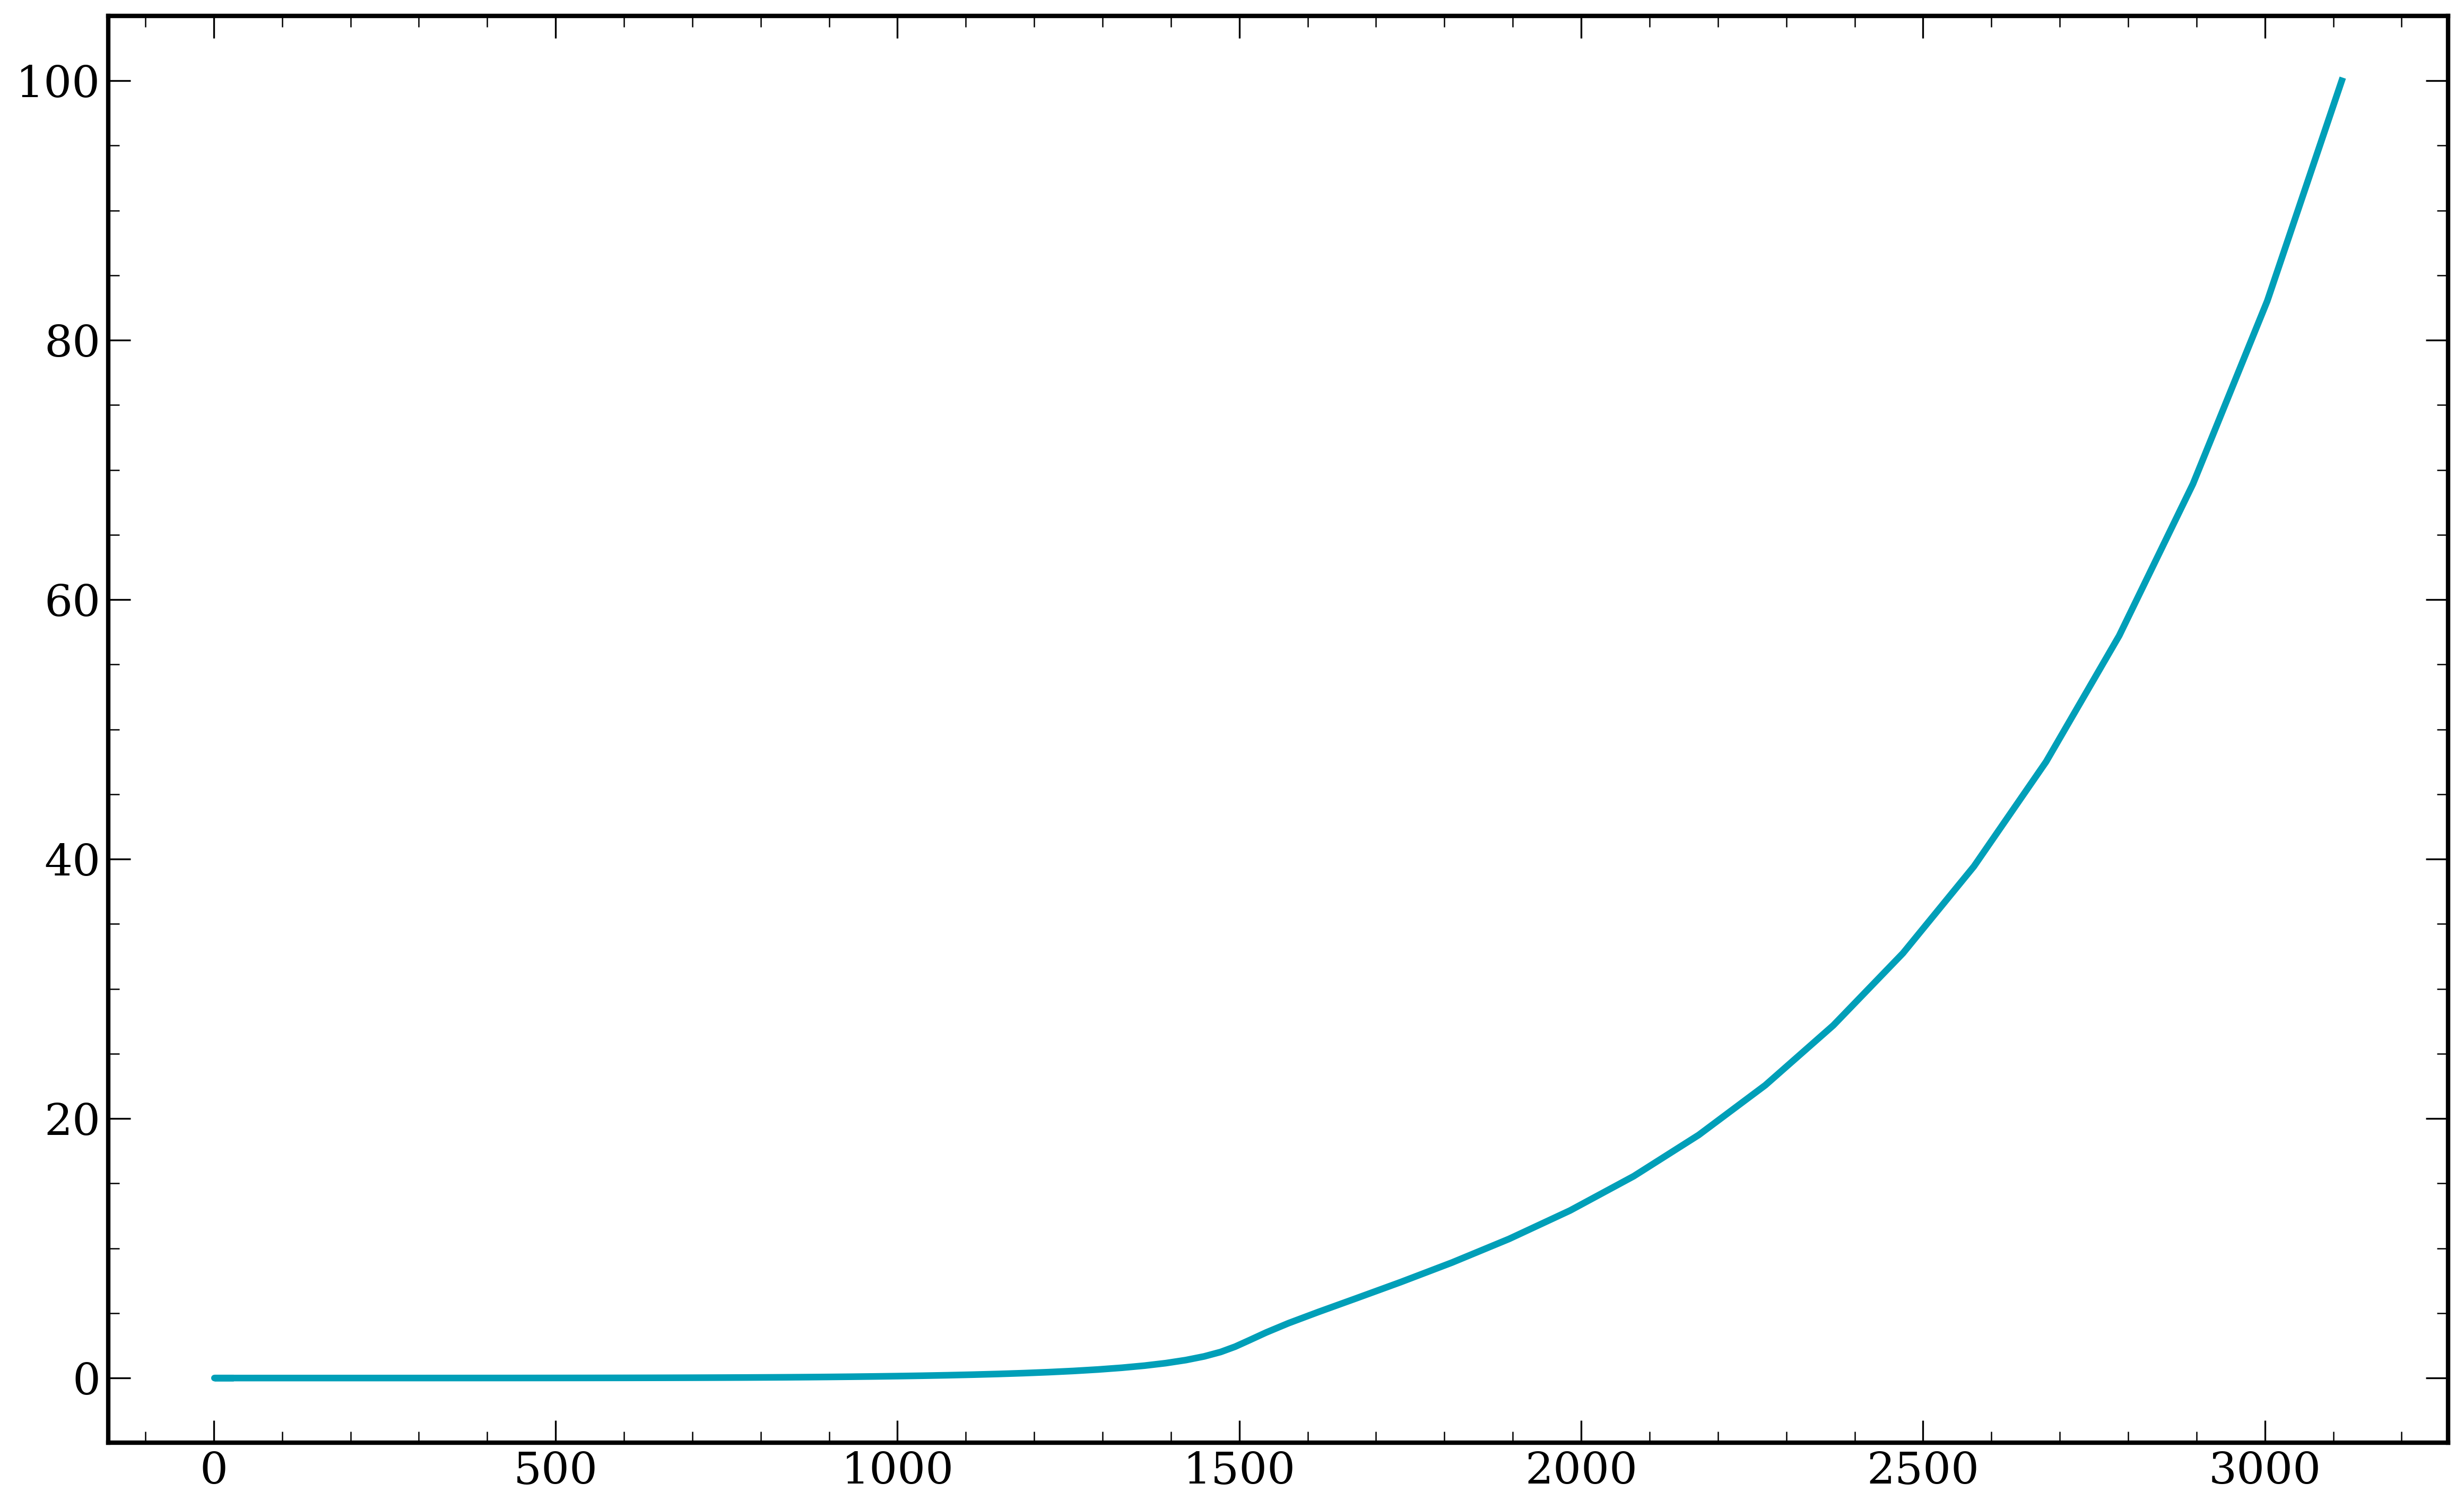

In [9]:
fig,ax = plt.subplots()
ax.plot(temperature,pressure, linewidth = 3)
ax.plot(T_hires,cond_curve_mg, label = "equilibrium MgSiO3(c)", linewidth = 3, linestyle = '--')
ax.axhline(10**parameters["log_Pbase_MgSiO3(c)"].value, linewidth = 3, linestyle = "--")
ax.set_ylim(1e2,1e-6)
ax.set_xlim(-100,3100)
ax.set_yscale('log')
ax.set_xlabel("Temperature [K]")
ax.set_ylabel("Pressure [bar]")
ax.legend()
#plt.savefig("plots/HR8799b_SilicateCondensationCurve.pdf",bbox_inches='tight')

Text(0, 0.5, 'Cloud Opacities [cm$^{2}$/g]')

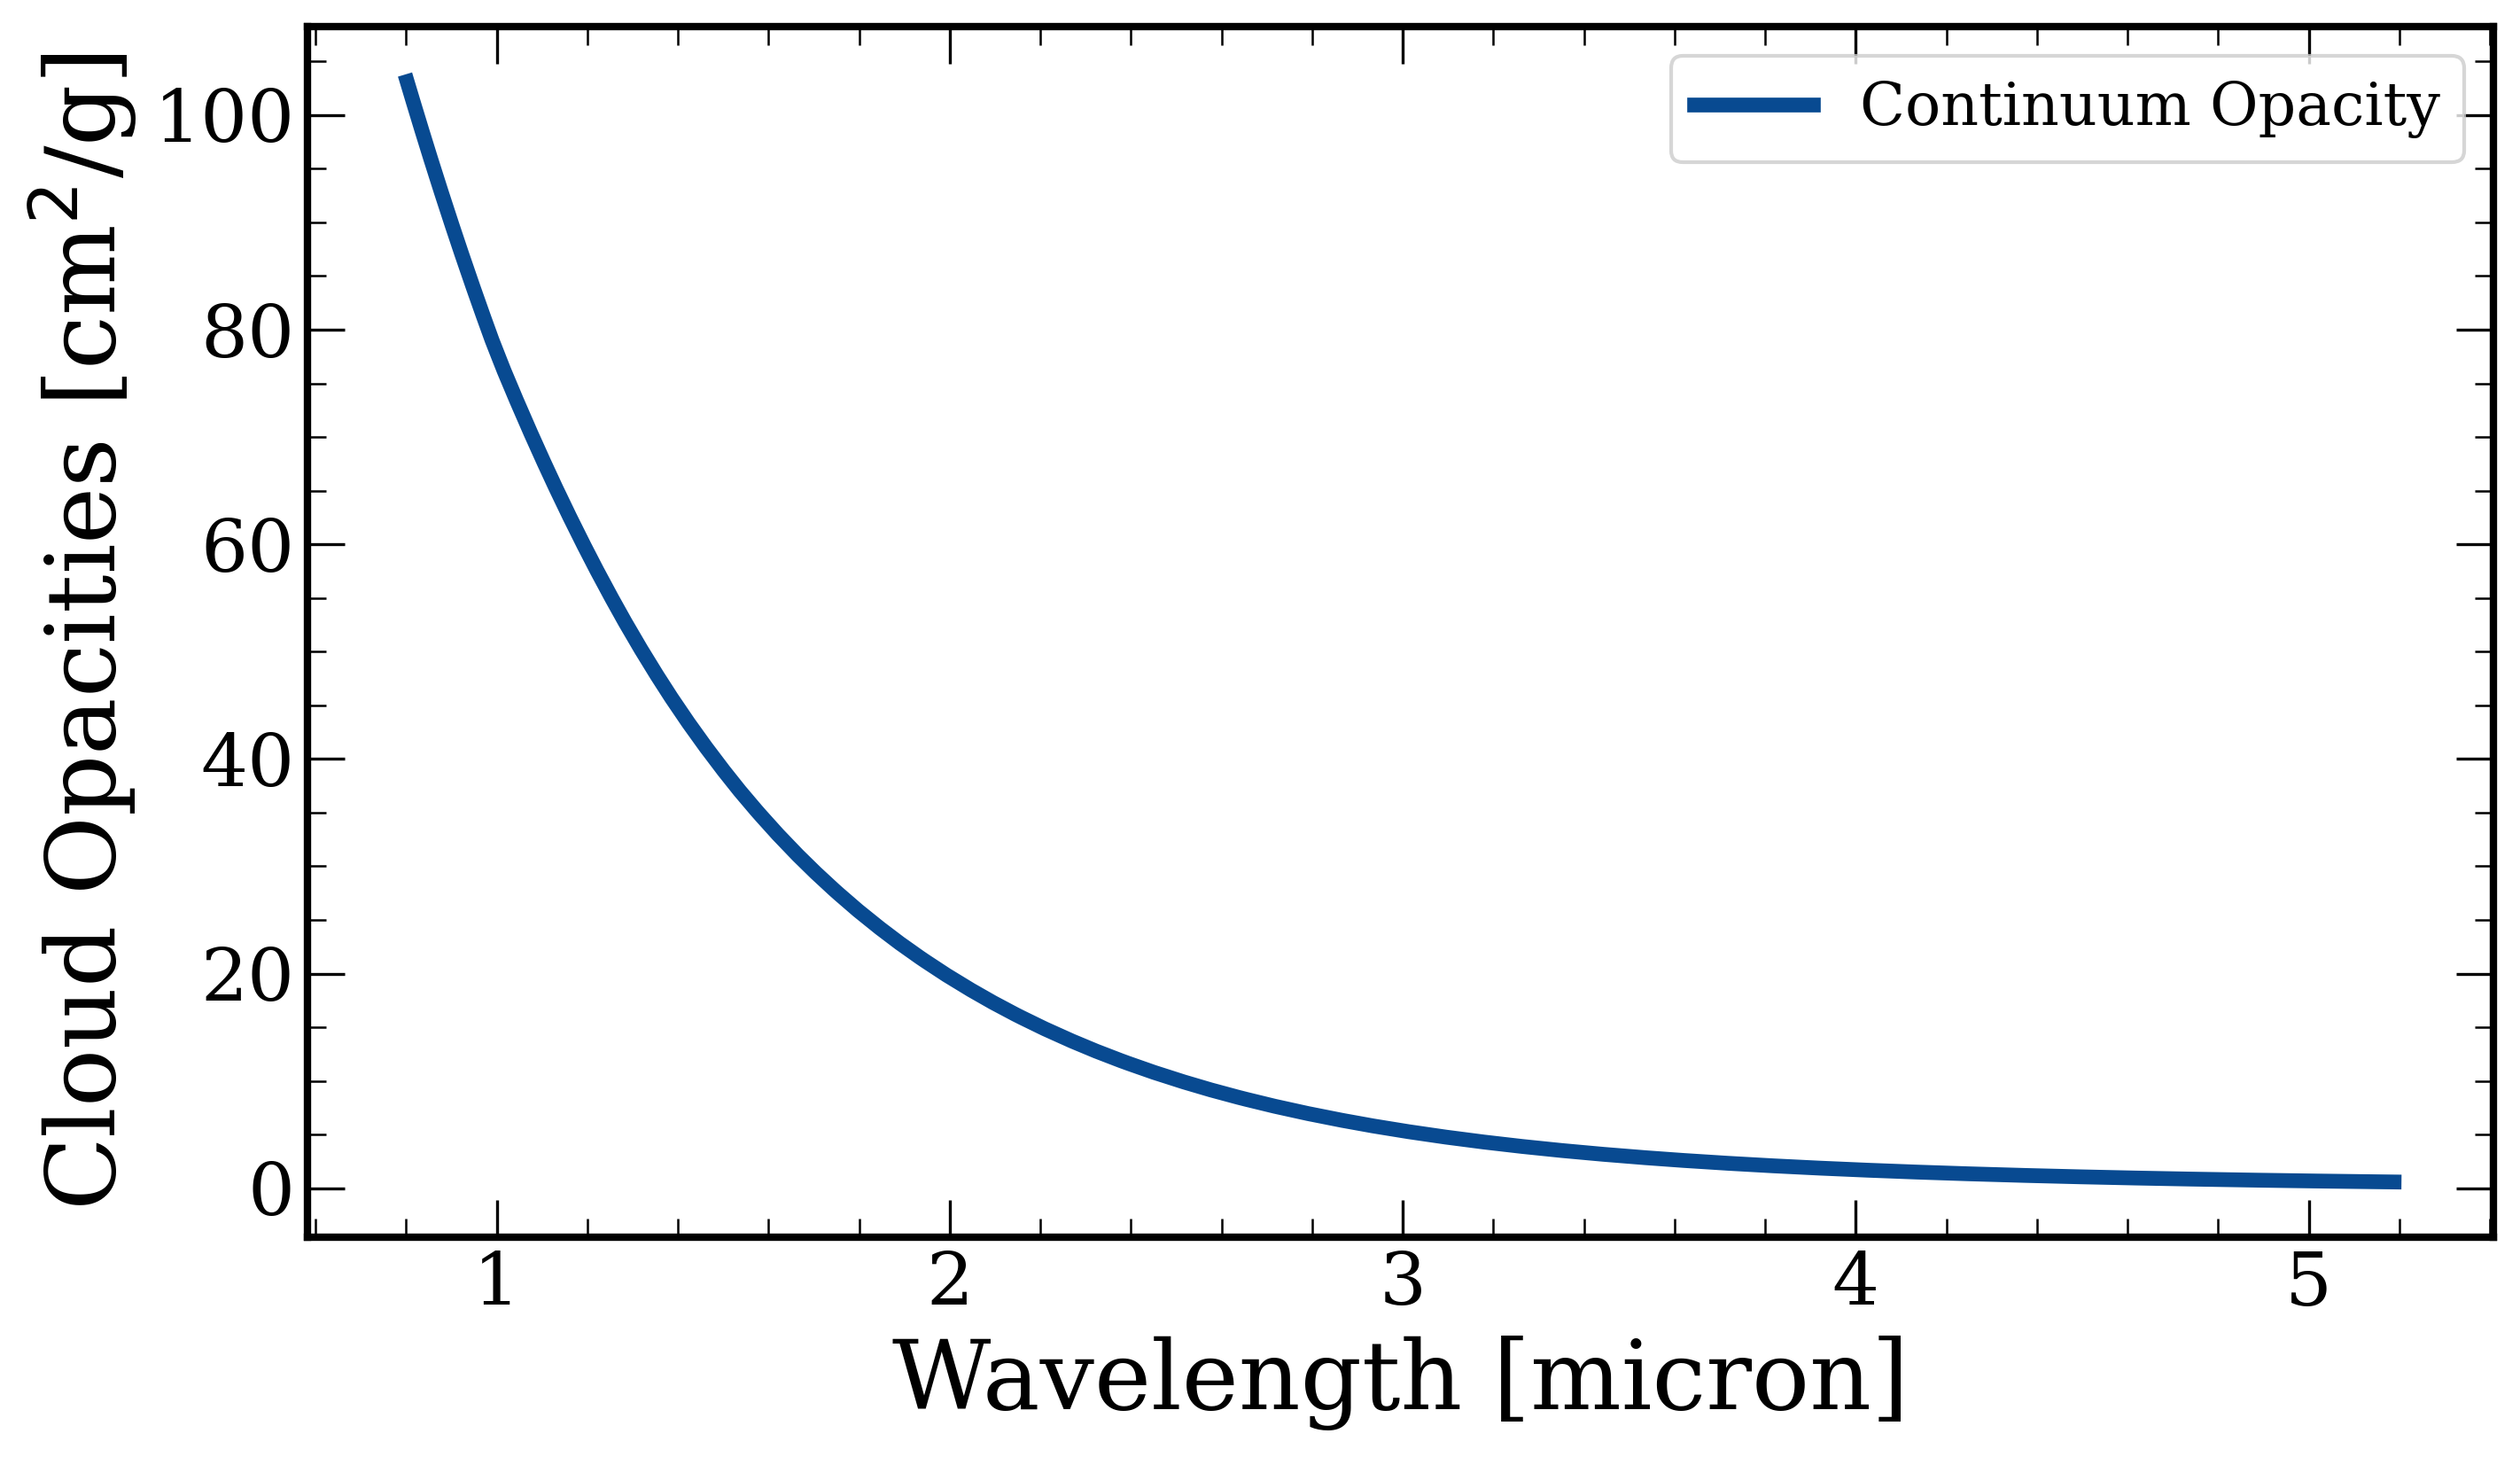

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

qual_map = sc.ScicoSequential(cmap='Blues')
fixed_cmap = qual_map.get_mpl_color_map()
ax.plot(wavelength, np.sum(atmosphere.continuum_opa_scat,axis=1), color = fixed_cmap(0.9), label = "Continuum Opacity",linewidth = 4)
#ax.plot(wlen, np.sum(cloud5.continuum_opa_scat,axis=1), color = cmap(0.2), label = "MgSiO$_{3}$, crystalline, Mie",linewidth = 4)

#ax.plot(wlen, np.sum(atmosphere.continuum_opa_scat,axis=1), color = 'k', label = "Fe, crystalline" ,linewidth = 4)#"Mg$_{2}$SiO$_{4}$, cm"
ax.legend(fontsize = 16)

ax.set_xlabel("Wavelength [micron]")
ax.set_ylabel("Cloud Opacities [cm$^{2}$/g]")
#plt.savefig("plots/HR8799b_SummedCloudOpacities.pdf", bbox_inches = 'tight')

0.0012652969134785634 2.2146806336797167


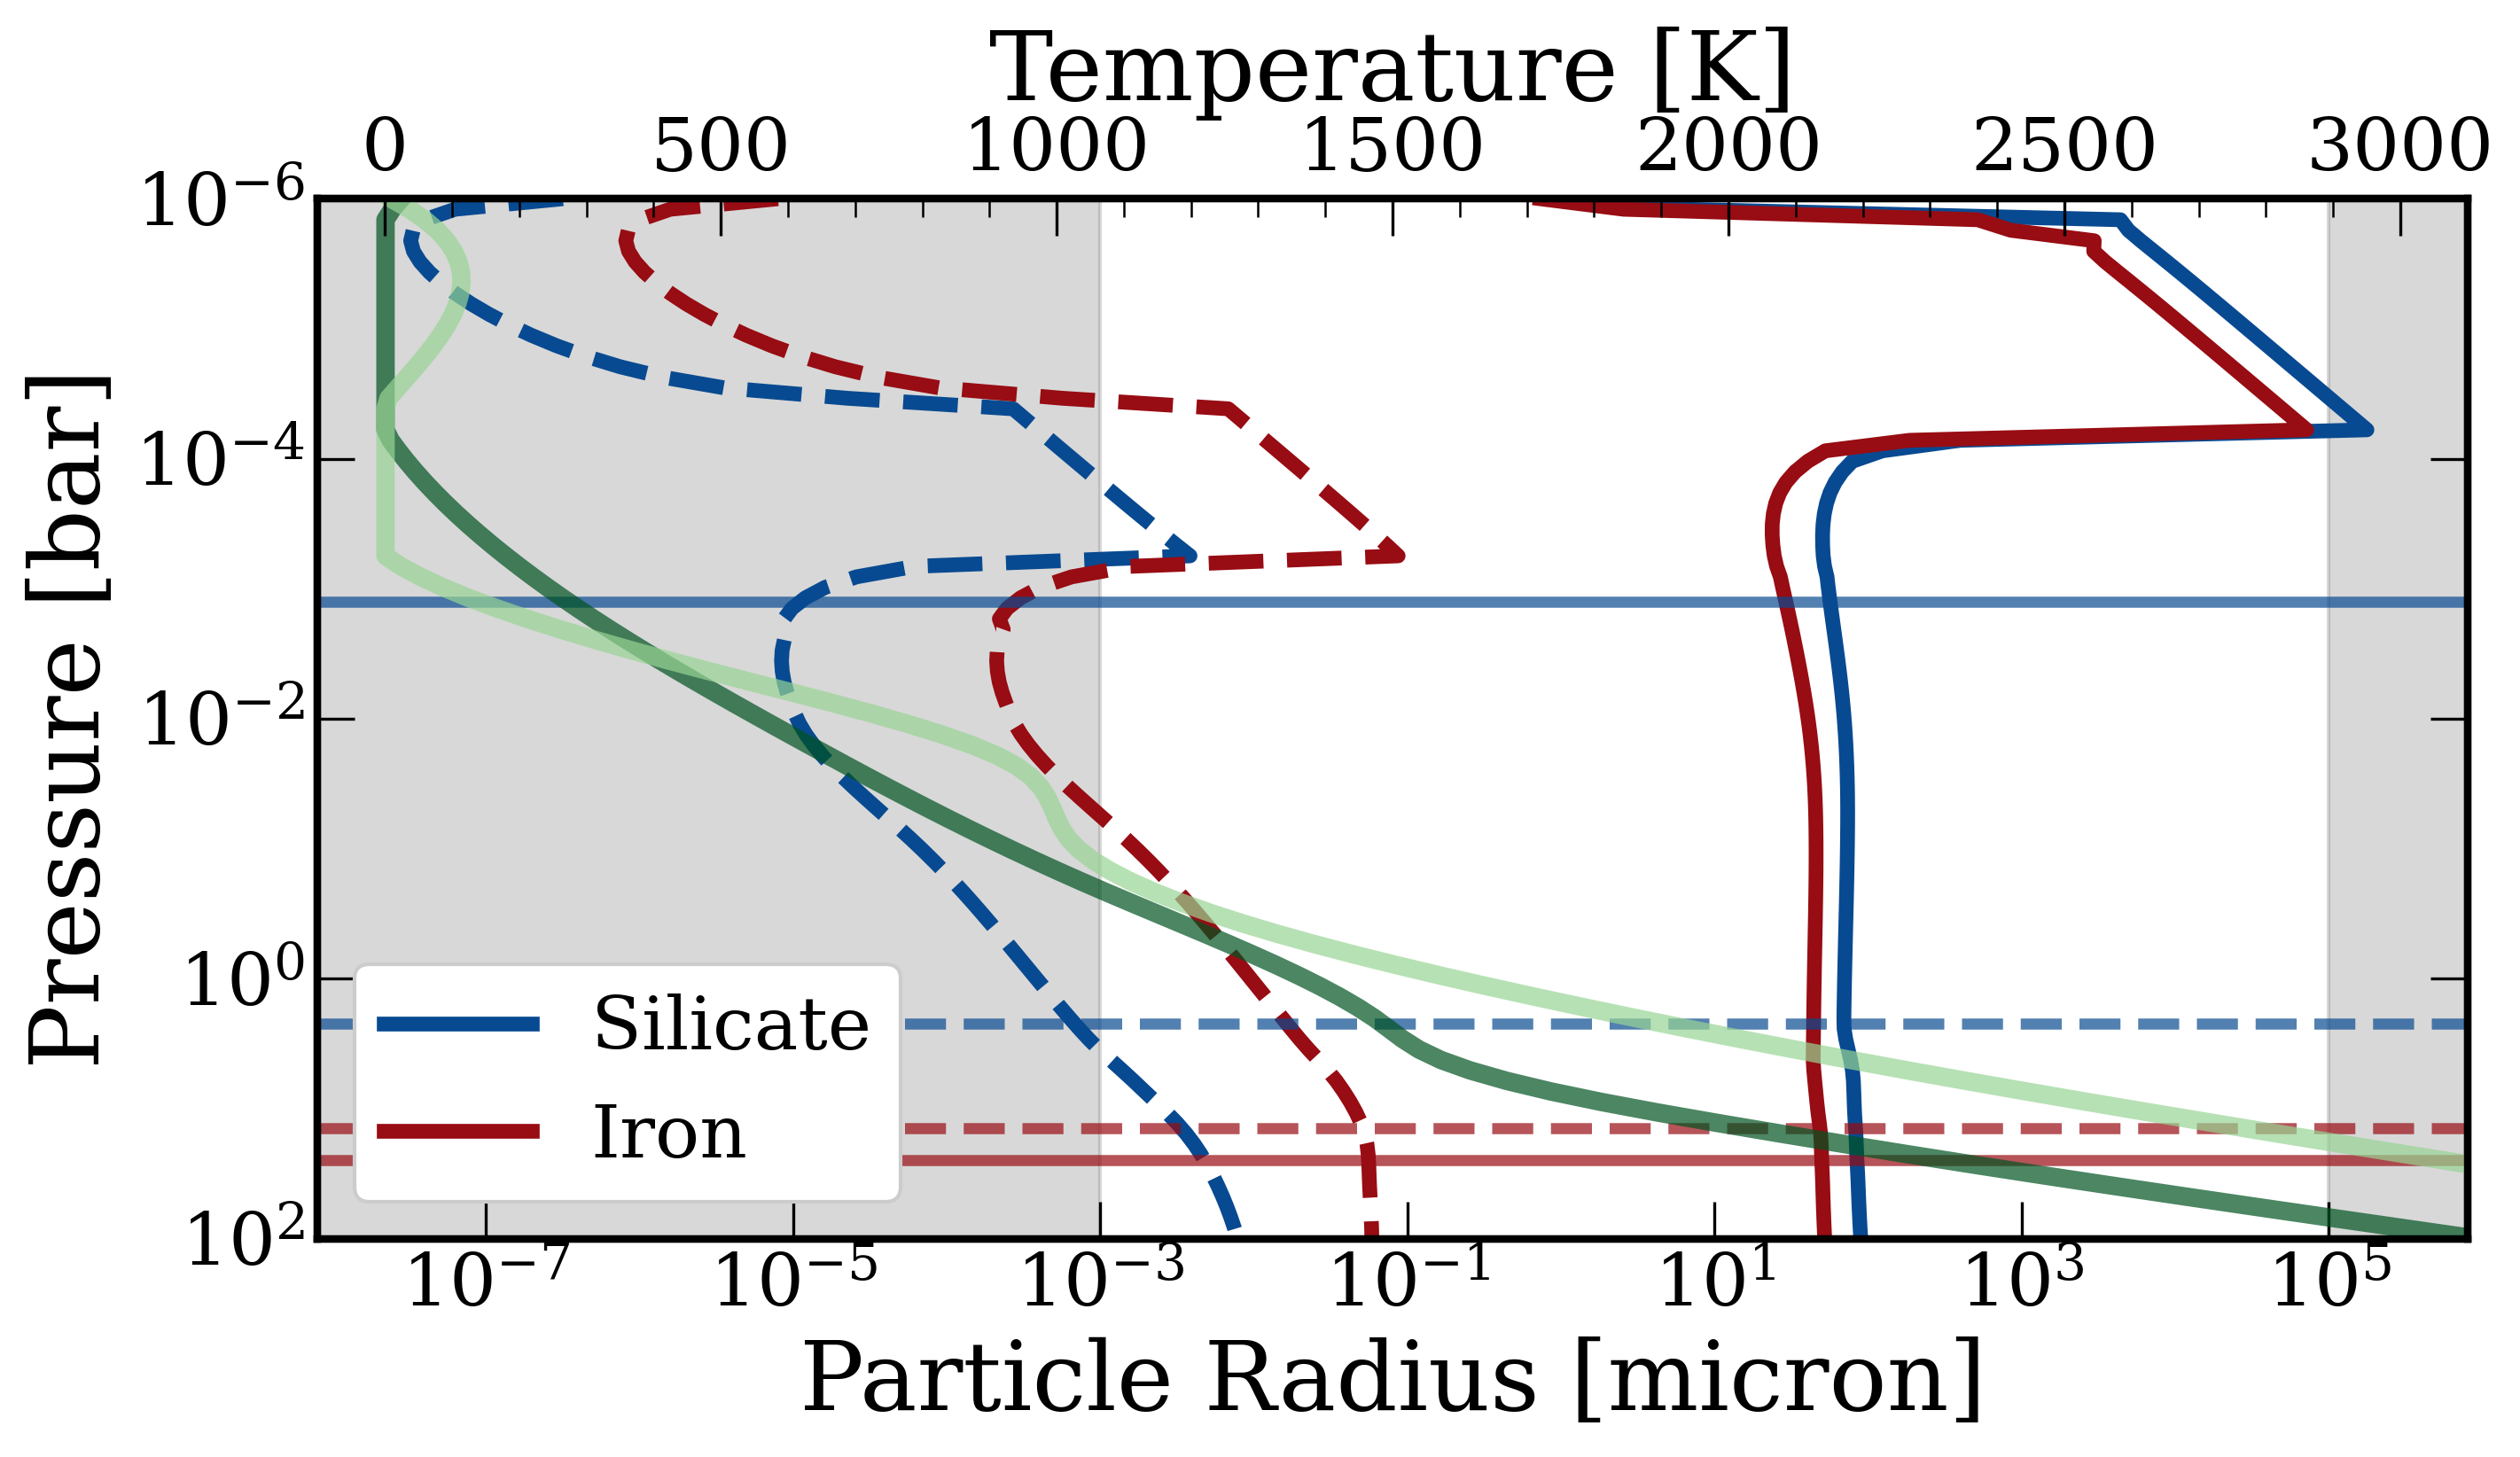

In [120]:
fig, ax = plt.subplots(figsize = (10,6))


qual_map = sc.ScicoSequential(cmap='Blues')
blue_cmap = qual_map.get_mpl_color_map()
qual_map = sc.ScicoSequential(cmap='Reds')
red_cmap = qual_map.get_mpl_color_map()
ax.plot(atmosphere.r_g[:,0]*1e4,pressure, color = blue_cmap(0.9), label = "Silicate",linewidth = 4)
ax.plot(atmosphere.r_g[:,1]*1e4,pressure, color = red_cmap(0.9), label = "Iron",linewidth = 4)
ax.plot(eq_atmosphere.r_g[:,0]*1e4,pressure, color = blue_cmap(0.9),linewidth = 4,linestyle = "--")
ax.plot(eq_atmosphere.r_g[:,1]*1e4,pressure, color = red_cmap(0.9),linewidth = 4,linestyle = "--")

#ax.plot(wlen, np.sum(cloud5.continuum_opa_scat,axis=1), color = cmap(0.2), label = "MgSiO$_{3}$, crystalline, Mie",linewidth = 4)

#ax.plot(wlen, np.sum(atmosphere.continuum_opa_scat,axis=1), color = 'k', label = "Fe, crystalline" ,linewidth = 4)#"Mg$_{2}$SiO$_{4}$, cm"
print(Pbases["MgSiO3(c)"],eqPbases["MgSiO3(c)"])
ax.axhline(Pbases["MgSiO3(c)"], color = blue_cmap(0.9), linewidth=3,alpha=0.7)
ax.axhline(Pbases["Fe(c)"], color = red_cmap(0.9), linewidth=3,alpha=0.7)

ax.axhline(eqPbases["MgSiO3(c)"], color = blue_cmap(0.9), linewidth=3,linestyle = "--",alpha=0.7)
ax.axhline(eqPbases["Fe(c)"], color = red_cmap(0.9), linewidth=3,linestyle = "--",alpha=0.7)

ax.set_ylim(pressures[-1],pressures[0])
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc='lower left',fontsize = 20,framealpha=1)
ax2 = ax.twiny()

qual_map = sc.ScicoSequential(cmap='Greens')
green_cmap = qual_map.get_mpl_color_map()
ax2.plot(temperature,pressure, linewidth = 5,zorder = -10, color = green_cmap(0.95),alpha=0.7)
ax2.plot(eqtemperature,eqpressure, linewidth = 5,zorder = -10, color = green_cmap(0.4),alpha=0.7)

ax.set_xlabel("Particle Radius [micron]")
ax.set_ylabel("Pressure [bar]")
ax2.set_ylim(1e2,1e-6)
ax2.set_xlim(-100,3100)
ax2.set_yscale('log')
ax2.set_xlabel("Temperature [K]")
ax.fill_betweenx([1e2,1e-6],1e-9,1e-3,color='grey',alpha=0.3)
ax.fill_betweenx([1e2,1e-6],1e5,1e6,color='grey',alpha=0.3)

ax.set_xlim(8e-9,8e5)
plt.savefig("plots/HR8799b_ParticleR_g.pdf", bbox_inches = 'tight')

/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_67470/2679173007.py:6: UserWarning: The following kwargs were not used by contour: 'label'
  im = ax.contourf(XX, YY, np.log10(atmosphere.continuum_opa_scat.T), cmap = fixed_cmap, levels = 50,label = "Cloud Opacity")


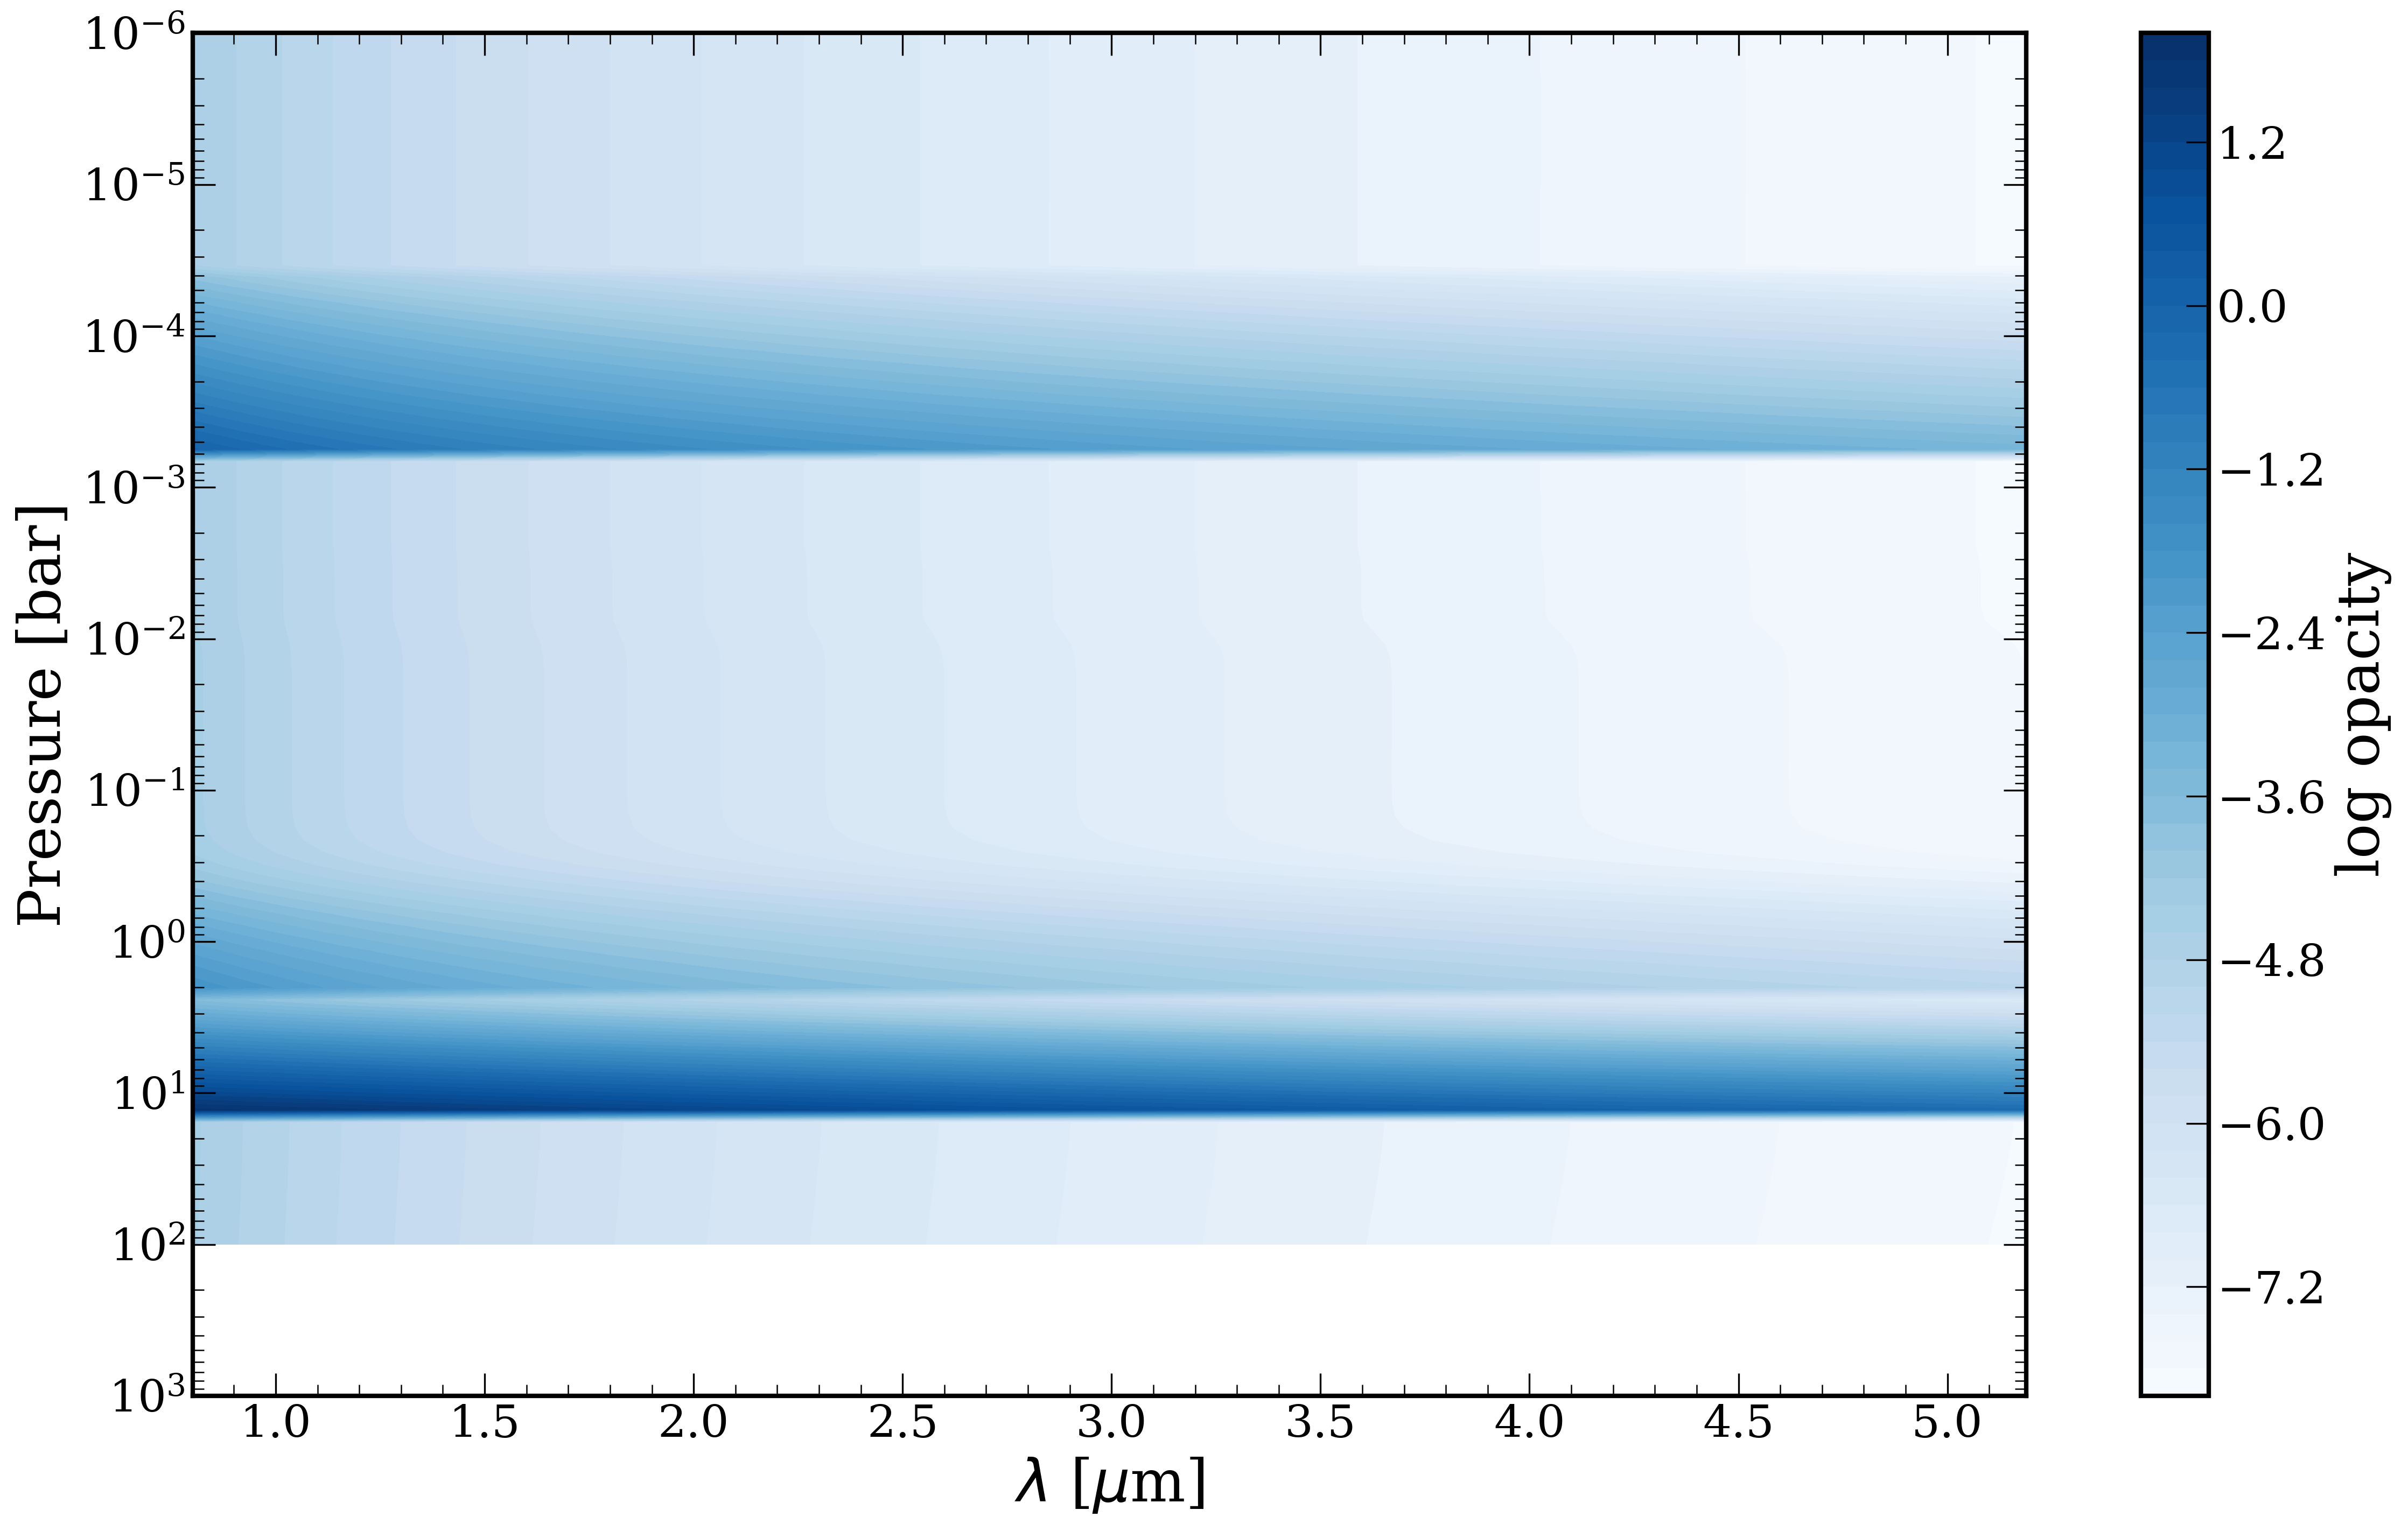

In [ ]:
fig, ax = plt.subplots()

XX, YY = np.meshgrid(wavelength,pressure)
plot_mgsi = cp.copy(atmosphere.continuum_opa_scat)
plot_mgsi[np.where(plot_mgsi < 1)] = np.nan
im = ax.contourf(XX, YY, np.log10(atmosphere.continuum_opa_scat.T), cmap = fixed_cmap, levels = 50,label = "Cloud Opacity")
plt.colorbar(im,ax=ax,label="log opacity")

ax.set_ylim(1e3,1e-6)
ax.set_yscale('log')
ax.set_xlabel("$\lambda$ [$\mu$m]")
ax.set_ylabel("Pressure [bar]")
plt.savefig("plots/HR8799b_CloudOpacitiesContour.pdf", bbox_inches = 'tight')

In [ ]:
abundances["MgSiO3(c)"]

array([0.19067363, 0.19582306, 0.20111156, 0.20654288, 0.21212089,
       0.21784954, 0.2237329 , 0.22977514, 0.23598057, 0.24235359,
       0.24889871, 0.2556206 , 0.26252403, 0.26961389, 0.27689522,
       0.2843732 , 0.29205313, 0.29994047, 0.30804082, 0.31635993,
       0.32490371, 0.33367823, 0.34268972, 0.35194458, 0.36144938,
       0.37121087, 0.38123598, 0.39153184, 0.40210575, 0.41296523,
       0.42411799, 0.43557194, 0.44733522, 0.45941619, 0.47182343,
       0.48456574, 0.49765217, 0.51109203, 0.52489485, 0.53907043,
       0.55362885, 0.56858044, 0.58393582, 0.5997059 , 0.61590187,
       0.63253524, 0.64961781, 0.66716173, 0.68517945, 0.70368377,
       0.72268782, 0.7422051 , 0.76224948, 0.78283519, 0.80397685,
       0.82568947, 0.84798847, 0.87088969, 0.89440939, 0.91856428,
       0.94337151, 0.96884869, 0.99501393, 1.02188579, 1.04948337,
       1.07782627, 1.10693461, 1.13682907, 1.16753087, 1.19906182,
       1.23144431, 1.26470134, 1.29885652, 1.33393412, 1.36995

In [ ]:
print("fsed = ",parameters["fsed"].value)
print("X_MgSiO3_base = ",np.max(abundances["MgSiO3(c)"]))
print(np.max(abundances["MgSiO3(c)"]) * (parameters["fsed"].value+1))


KeyError: 'fsed'

In [35]:
g,r = compute_gravity(eq_params)
eq_atmosphere.hack_cloud_photospheric_tau = True
optical_depth_cloud = eq_atmosphere.calc_opt_depth(g, cloud_wlen=None, plotting = True)


[[2.57744643e-05 2.57744596e-05 2.57744551e-05 ... 2.66879412e-05
  2.65406213e-05 2.63901484e-05]
 [2.54300799e-05 2.54300753e-05 2.54300708e-05 ... 2.63313075e-05
  2.61859631e-05 2.60375079e-05]
 [2.50903490e-05 2.50903444e-05 2.50903400e-05 ... 2.59794924e-05
  2.58360969e-05 2.56896323e-05]
 ...
 [1.48015068e-08 1.48015042e-08 1.48015016e-08 ... 1.53245617e-08
  1.52402066e-08 1.51540462e-08]
 [1.46053724e-08 1.46053698e-08 1.46053672e-08 ... 1.51214962e-08
  1.50382590e-08 1.49532402e-08]
 [1.44118373e-08 1.44118347e-08 1.44118322e-08 ... 1.49211219e-08
  1.48389877e-08 1.47550955e-08]] [[8.42470134e-64 1.69559286e-88 8.40335525e-94 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.30716713e-64 1.67657251e-88 8.30909940e-94 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.20007006e-64 1.65892076e-88 8.22162492e-94 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.08179546e-67 1.57557962e-91 7.81003171e-97 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]

/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_35389/219090947.py:8: RuntimeWarning: divide by zero encountered in log10
  lowerliminds = np.where(np.log10(opt_T) < -8)


[[1.00000000e-09 1.00000000e-09 1.00000000e-09 ... 1.00000000e-09
  1.00000000e-09 1.00000000e-09]
 [1.00000000e-09 1.00000000e-09 1.00000000e-09 ... 1.00000000e-09
  1.00000000e-09 1.00000000e-09]
 [1.00000000e-09 1.00000000e-09 1.00000000e-09 ... 1.00000000e-09
  1.00000000e-09 1.00000000e-09]
 ...
 [3.47146698e+04 3.46554688e+04 3.45950022e+04 ... 2.80501734e+03
  2.81977932e+03 2.83700143e+03]
 [3.47146698e+04 3.46554688e+04 3.45950022e+04 ... 2.80501734e+03
  2.81977932e+03 2.83700143e+03]
 [3.47146698e+04 3.46554688e+04 3.45950022e+04 ... 2.80501734e+03
  2.81977932e+03 2.83700143e+03]] [71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 7

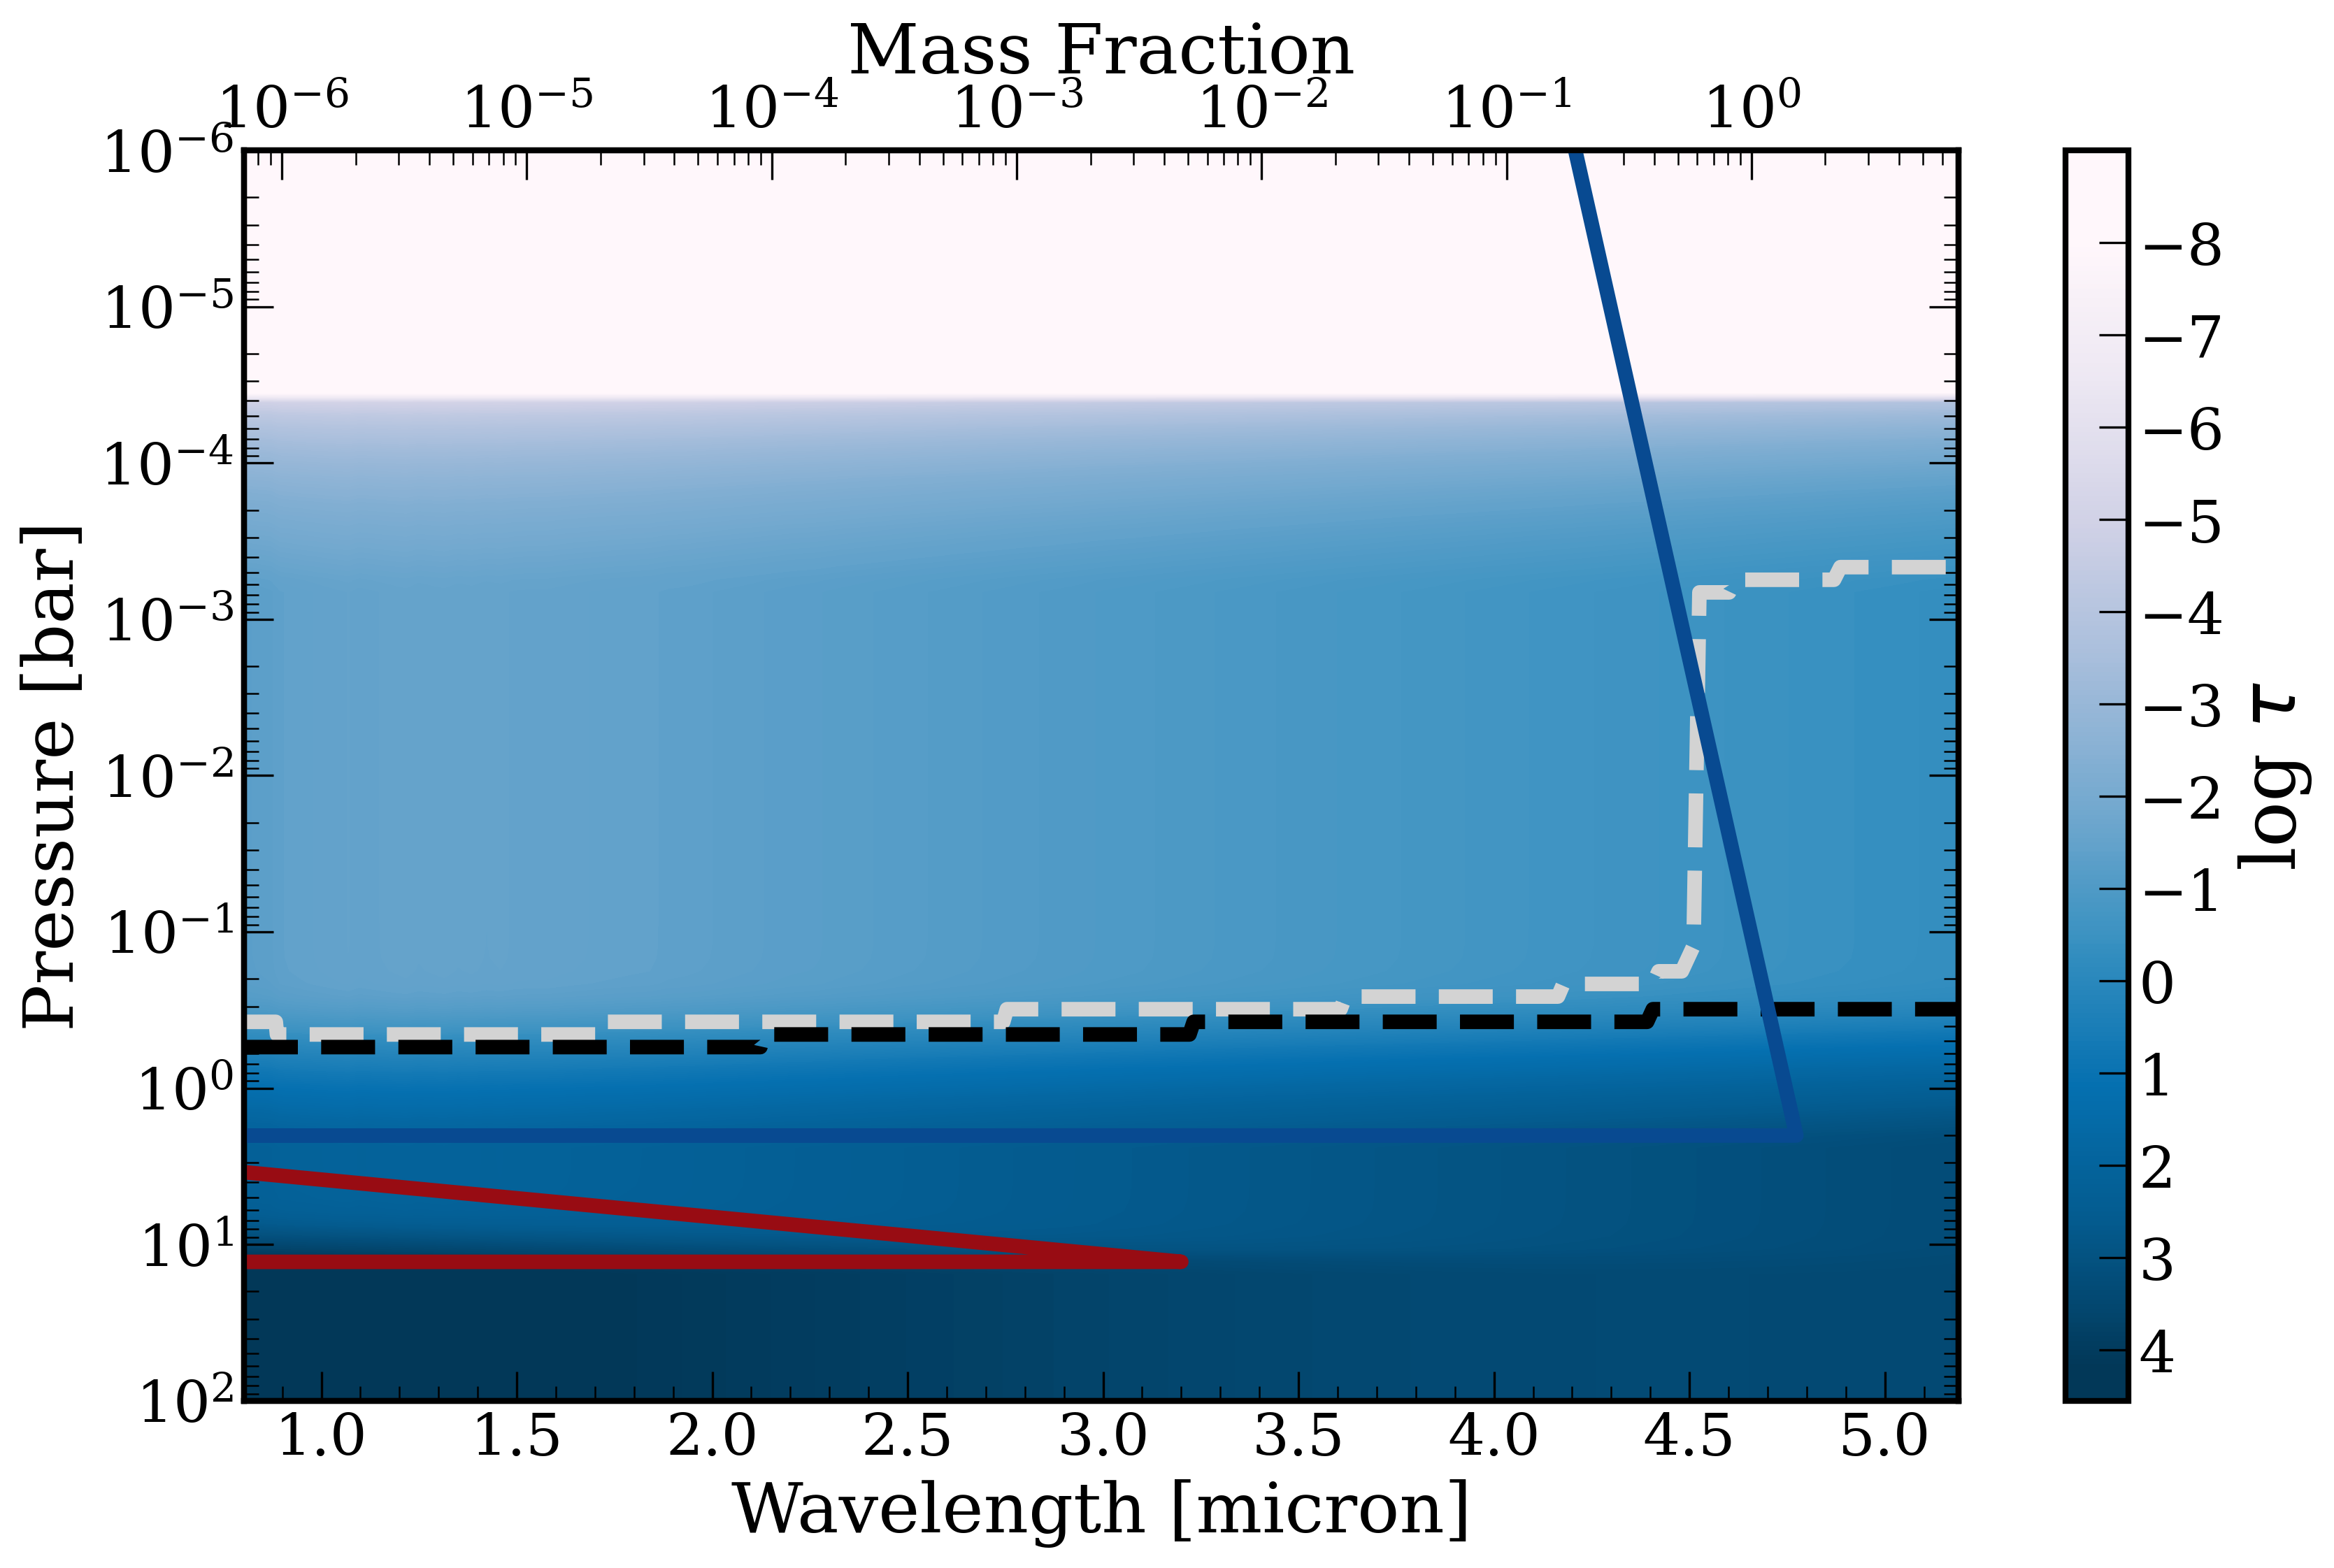

In [36]:
fig, ax = plt.subplots(figsize = (12,8))
XX,YY = np.meshgrid(wavelength,pressures)

qual_map = sc.ScicoSequential(cmap='PuBu')
fixed_cmap = qual_map.get_mpl_color_map()

opt_T = optical_depth_cloud.T
lowerliminds = np.where(np.log10(opt_T) < -8)
opt_T_mask = opt_T
opt_T_mask[lowerliminds] = 1e-9

im = ax.contourf(XX,YY, np.log10(opt_T_mask), cmap = fixed_cmap,levels=300, vmin = -8,vmax = 4.2)


qual_map = sc.ScicoSequential(cmap='Blues')
blue_cmap = qual_map.get_mpl_color_map()
qual_map = sc.ScicoSequential(cmap='Reds')
red_cmap = qual_map.get_mpl_color_map()

opt_T[np.isnan(opt_T)] = 1e-90
opt_T[np.where(opt_T==-np.inf)] = 1e-90

inds = np.argmin(np.abs(np.log10(opt_T)-np.log10(0.3)),axis=0)
ax.plot(wavelength,pressures[inds],color = 'lightgrey', linestyle = '--', linewidth = 5, label = r"$\tau=0.1$")


inds = np.argmin(np.abs(np.log10(opt_T)),axis=0)
print(opt_T,inds)
ax.plot(wavelength,pressures[inds],color = 'k', linewidth = 5, linestyle = '--', label = r"$\tau=1.0$")
ax.set_ylim(1e2,1e-6)
ax.set_yscale('log')
cbar = plt.colorbar(im,label = r"log $\tau$")
cbar.ax.invert_yaxis()
cbar.ax.set_yticks([-8, -7, -6,-5, -4,-3, -2, -1, 0, 1, 2,3,4])

ax2 = ax.twiny()
ax2.plot(eqabundances["MgSiO3(c)"],pressures, color = blue_cmap(0.9),linewidth = 5, label = r"MgSiO$_{3}$")
ax2.plot(eqabundances["Fe(c)"], pressures, color = red_cmap(0.9),linewidth = 5, label = "Fe")
ax2.set_xscale('log')
ax2.set_xlabel("Mass Fraction", fontsize = 24)
ax2.set_xlim(7e-7,7)
ax.set_xlabel("Wavelength [micron]", fontsize = 24)
ax.set_ylabel("Pressure [bar]", fontsize = 24)
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=blue_cmap(0.9), lw=5),
                Line2D([0], [0], color=red_cmap(0.9), lw=5),   
                Line2D([0], [0], color='lightgrey', lw=5, linestyle = '--'),
                Line2D([0], [0], color='k', lw=5, linestyle = '--')
                ]
#ax.legend(custom_lines, [r"$X_{\rm MgSiO_{3}}$",r"$X_{\rm Fe}$", r"$\tau=0.3$",r"$\tau=1.0$"],loc = 'upper left',fontsize=22, frameon=False)
plt.savefig("plots/HR8799b_eqcloud_optical_depth_massfrac_v01.png", bbox_inches = 'tight')


/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_35389/1925592448.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("plots/CloudOpticalConstants_v01.pdf",bbox_inches='tight')
/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_35389/1925592448.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("plots/CloudOpticalConstants_v01.pdf",bbox_inches='tight')
/Users/nasedkin/anaconda3/envs/pRTUpdate/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


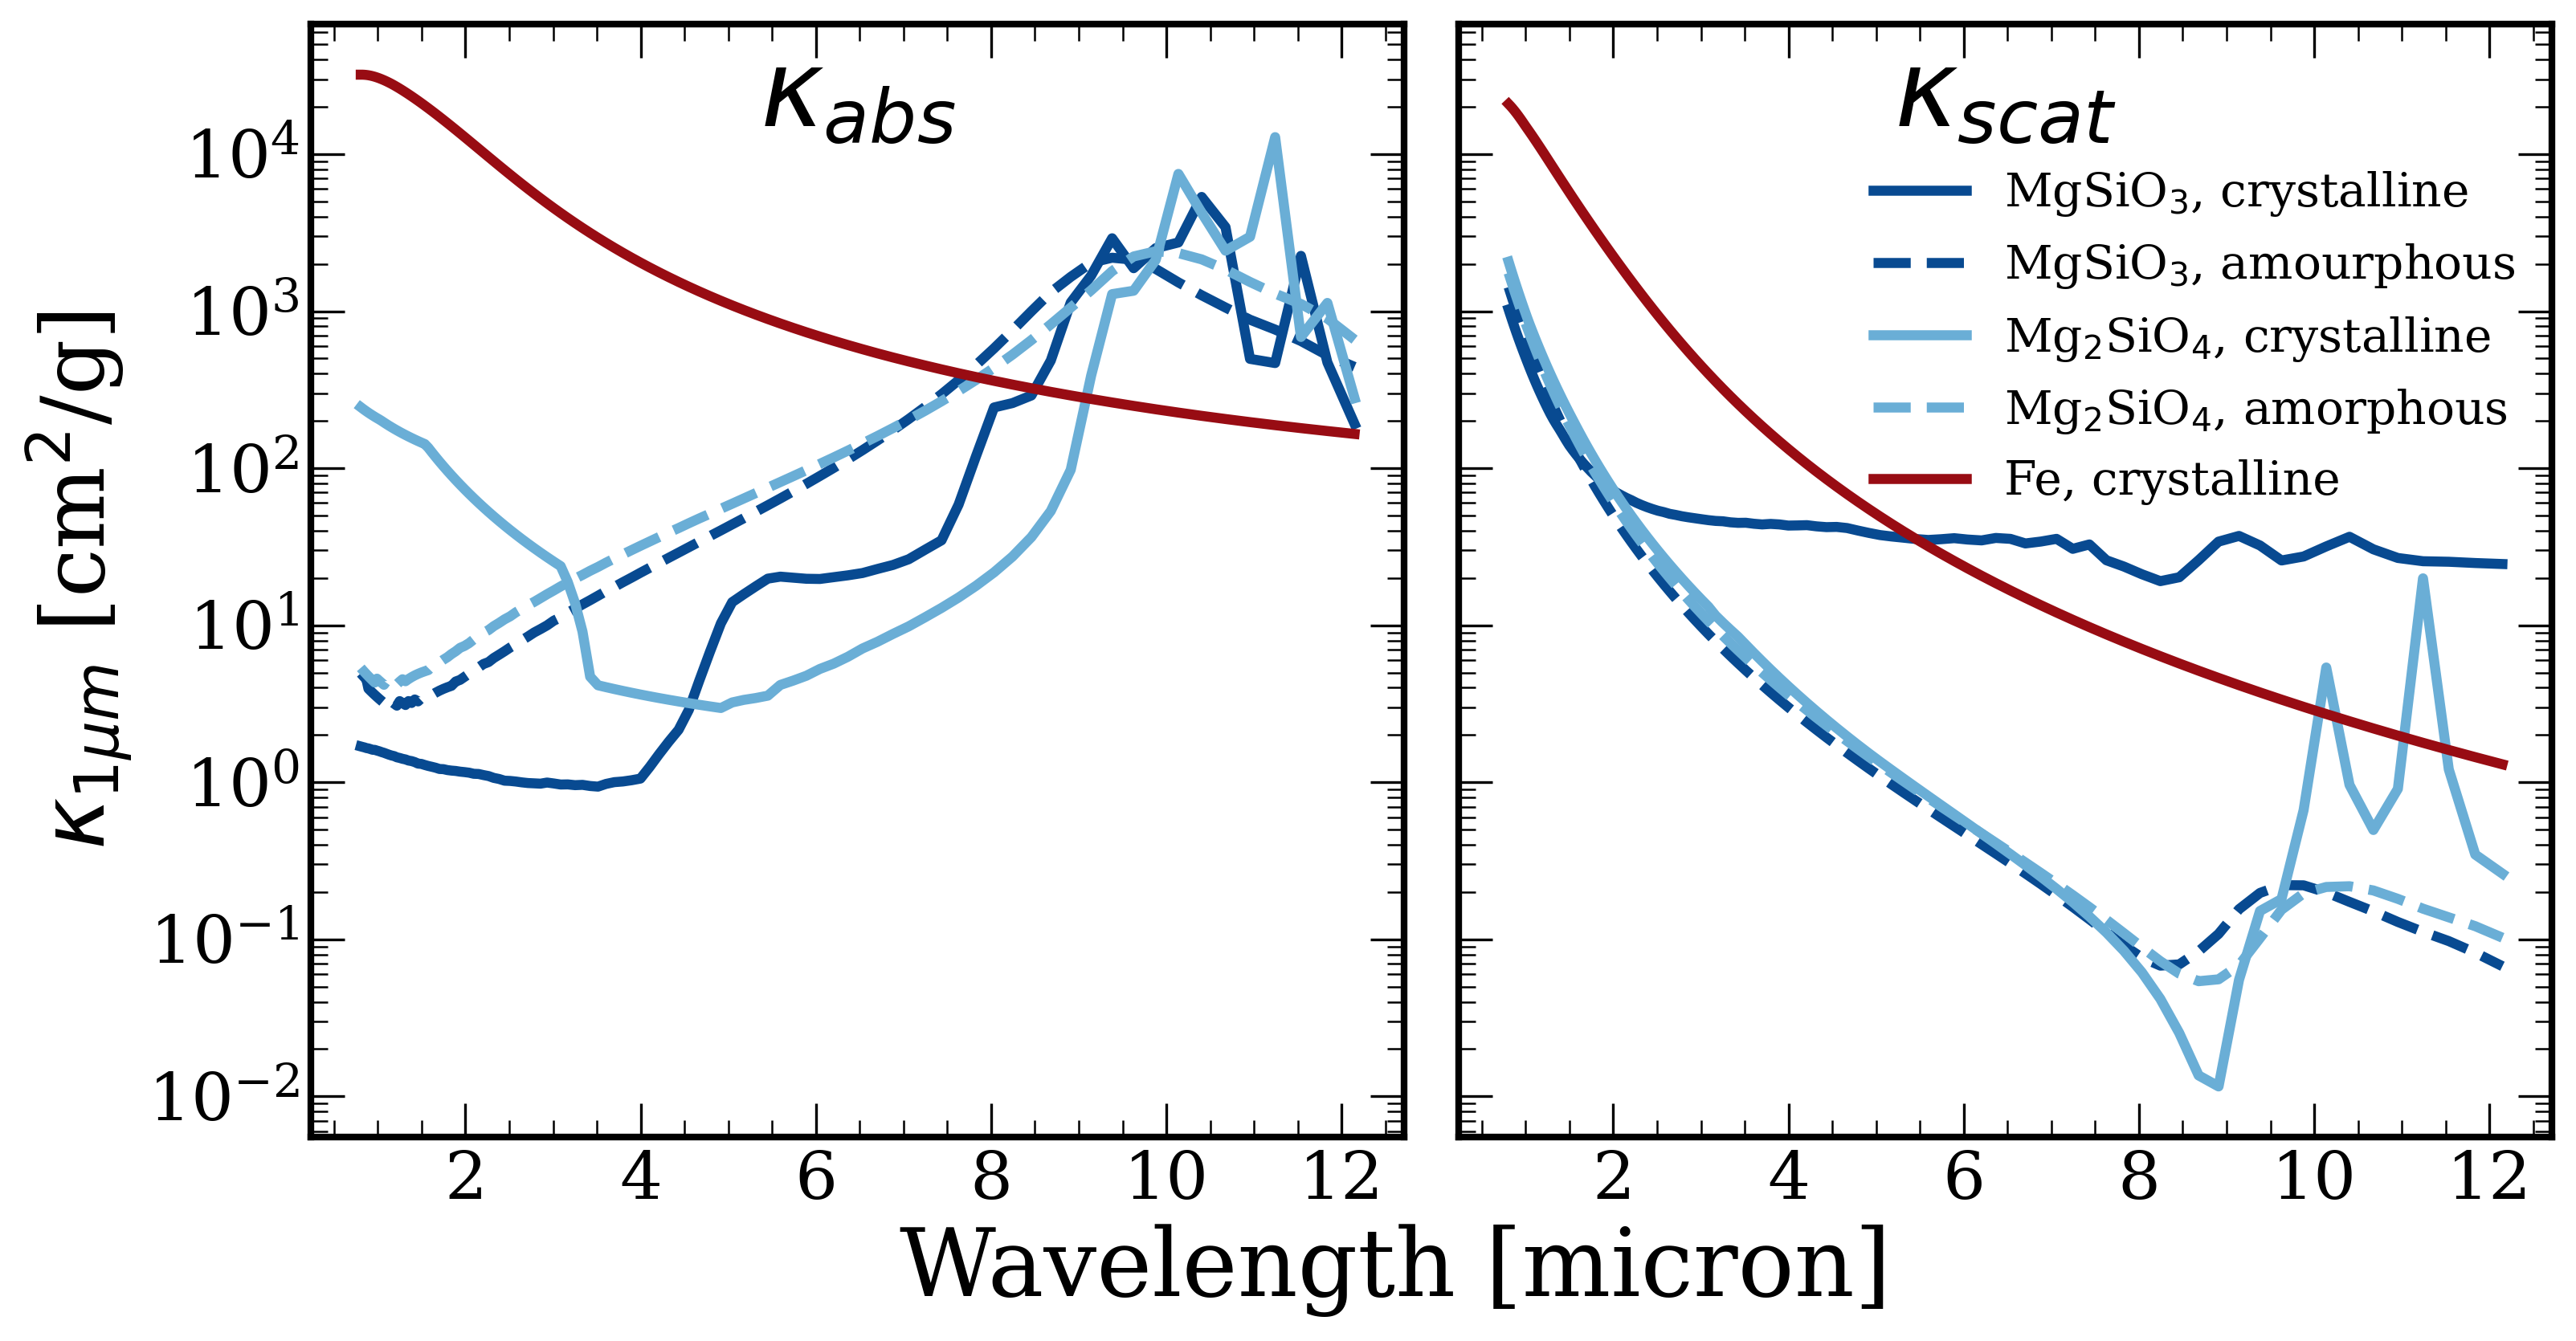

In [103]:
mgsio3c = np.genfromtxt("/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/opacities/continuum/clouds/MgSiO3_c/crystalline/DHS/opa_0033.dat")
mgsio3a = np.genfromtxt("/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/opacities/continuum/clouds/MgSiO3_c/amorphous/DHS/opa_0033.dat")

mg2sio4c = np.genfromtxt("/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/opacities/continuum/clouds/Mg2SiO4_c/crystalline/DHS/opa_0033.dat")
mg2sio4a = np.genfromtxt("/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/opacities/continuum/clouds/Mg2SiO4_c/amorphous/DHS/opa_0033.dat")

fec = np.genfromtxt("/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/opacities/continuum/clouds/Fe_c/crystalline/DHS/opa_0033.dat")

fig, ax = plt.subplots(figsize = (12,6),
                       ncols = 2,
                       sharey=True,
                       gridspec_kw={'wspace':0.05})
ax = ax.flatten()
qual_map = sc.ScicoSequential(cmap='Blues')
blue_cmap = qual_map.get_mpl_color_map()
qual_map = sc.ScicoSequential(cmap='PuRd')
p_cmap = qual_map.get_mpl_color_map()
qual_map = sc.ScicoSequential(cmap='Reds')
red_cmap = qual_map.get_mpl_color_map()

wlen_inds = np.where((mgsio3c[:,0]>0.8) & (mgsio3c[:,0]<12.2))[0]
ax[0].plot(mgsio3c[wlen_inds,0],mgsio3c[wlen_inds,1],color=blue_cmap(0.9),linewidth=3)
ax[1].plot(mgsio3c[wlen_inds,0],mgsio3c[wlen_inds,2],color=blue_cmap(0.9), label = r"MgSiO$_{3}$, crystalline",linewidth=3)
ax[0].plot(mgsio3a[wlen_inds,0],mgsio3a[wlen_inds,1],color=blue_cmap(0.9),linewidth=3, linestyle = '--')
ax[1].plot(mgsio3a[wlen_inds,0],mgsio3a[wlen_inds,2],color=blue_cmap(0.9), label = r"MgSiO$_{3}$, amourphous",linewidth=3, linestyle = '--')

ax[0].plot(mg2sio4c[wlen_inds,0],mg2sio4c[wlen_inds,1],color=blue_cmap(0.5),linewidth=3)
ax[1].plot(mg2sio4c[wlen_inds,0],mg2sio4c[wlen_inds,2],color=blue_cmap(0.5), label = r"Mg$_{2}$SiO$_{4}$, crystalline",linewidth=3)
ax[0].plot(mg2sio4a[wlen_inds,0],mg2sio4a[wlen_inds,1],color=blue_cmap(0.5),linewidth=3, linestyle = '--')
ax[1].plot(mg2sio4a[wlen_inds,0],mg2sio4a[wlen_inds,2],color=blue_cmap(0.5), label = r"Mg$_{2}$SiO$_{4}$, amorphous",linewidth=3, linestyle = '--')

ax[0].plot(fec[wlen_inds,0],fec[wlen_inds,1],color=red_cmap(0.9),linewidth=3)
ax[1].plot(fec[wlen_inds,0],fec[wlen_inds,2],color=red_cmap(0.9), label = r"Fe, crystalline",linewidth=3)
ax[1].set_yscale('log')
ax[0].set_title(r"$\kappa_{abs}$",y=0.89)
ax[1].set_title(r"$\kappa_{scat}$",y=0.89)
ax[1].legend(frameon=False,fontsize =14,bbox_to_anchor=(0.34,0.53))
ax[0].set_ylabel(r"$\kappa_{1\mu m}$ [cm$^2$/g]")
ax[0].set_xticks([2,4,6,8,10,12])
ax[1].set_xticks([2,4,6,8,10,12])
fig.text(0.5,0, 'Wavelength [micron]', ha='center', fontsize = 28)
plt.savefig("plots/CloudOpticalConstants_v01.pdf",bbox_inches='tight')